<h3> GRIP internship #jun2022 </h3>


# Author : Dadoune Fatima ezzahra

# Task 03 : Exploratory Data Analysis Retail Superstore

## Importing Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
import os

import csv
path = "C:/Users/azus/Desktop" # /content is pretty much the root. you can choose other path in your colab workspace
os.chdir(path)
! pip install matplotlib
! pip install openpyxl

## Reading Data

In [2]:
data=pd.read_csv('C:/Users/azus/Desktop/SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Analysis of Dataset

In [3]:
data.shape

(9994, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Drop Unwanted Features

In [5]:
data['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [6]:
#drop country and postal code since all the data are from United States
data.drop(['Country','Postal Code'],inplace=True, axis=1)

### Null Values

In [7]:
data.isnull().sum()

Ship Mode       0
Segment         0
City            0
State           0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### Correlation

<AxesSubplot:>

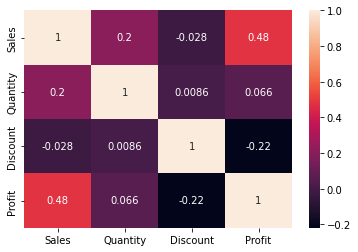

In [8]:
figure_1=data.corr()
sns.heatmap(figure_1,annot=True)

  * From the correlation coefficients it is evident that relation between variables is not strong enough.
        * Discount and Profit,Discount and Sales are negatively Correlated.
        * Sales and profit are netrually correlated
       


# We can analyse the data further in 3 different ways

##### 1)Sales ,Profit ,Discount Analysis at each Level

##### 2)Product Category Level Analysis

##### 3) Geographic Level Analysis



## 1) Sales Vs Profit Vs Discount


### a) Based on Region

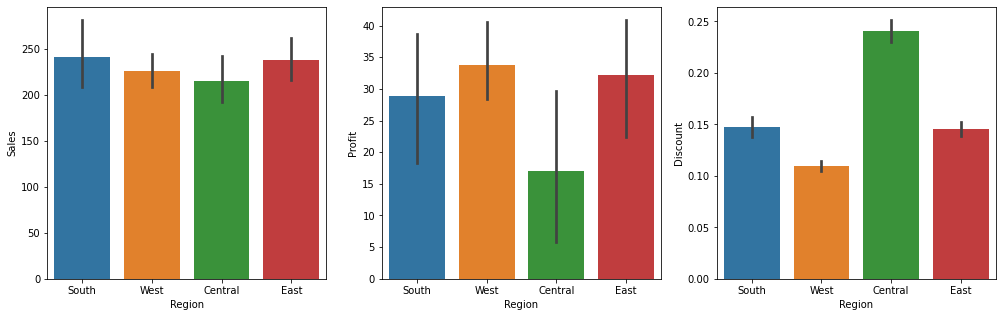

In [9]:
fig, ax =plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Region', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Region', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Region', y='Discount', data = data,ax=ax[2])
plt.show()

 * Though the Sales is Souther region is high 
 * The Profits are highest in Western region Because of low Discounts
 * Central region has highest discount, probably the reason for lowest profits


### b) Based on Category

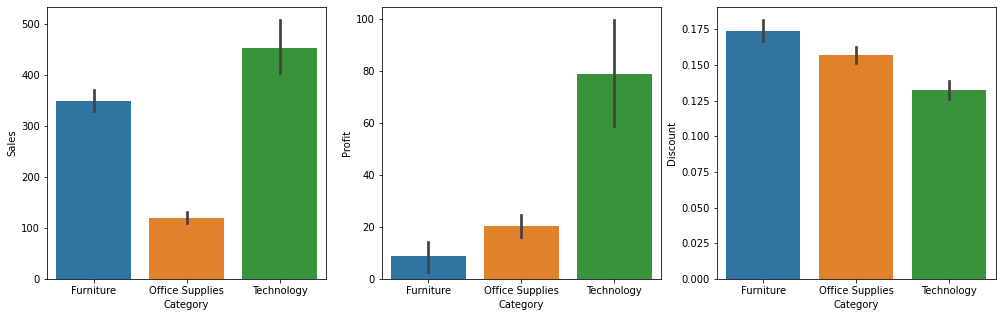

In [10]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Category', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Category', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Category', y='Discount', data = data,ax=ax[2])
plt.show()

*  Inspite of having less discounts Technology is having highest Profits and sales.
* Though the sales of Furniture are high the profits are not so comparable.

### c) Based on  Segement

<AxesSubplot:xlabel='Segment', ylabel='Discount'>

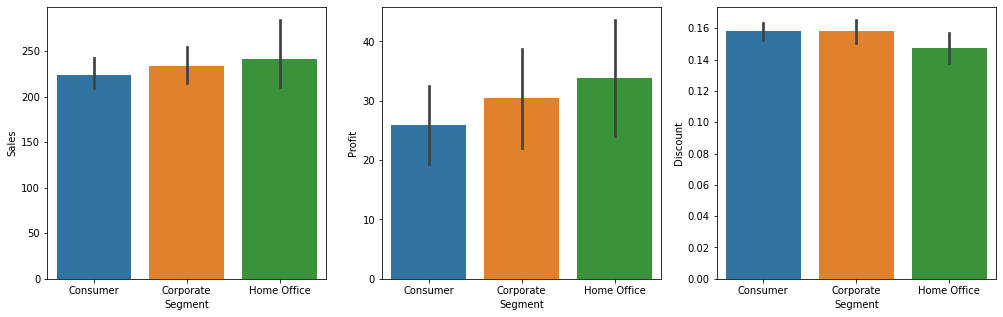

In [11]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Segment', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Segment', y='Discount', data = data,ax=ax[2])

* We can observe that both sales and profit of "Home Office" segment is highest but have less discounts.
* Having high discounts in consumer segment , it has low profits

### d) Based on Ship mode

<AxesSubplot:xlabel='Ship Mode', ylabel='Discount'>

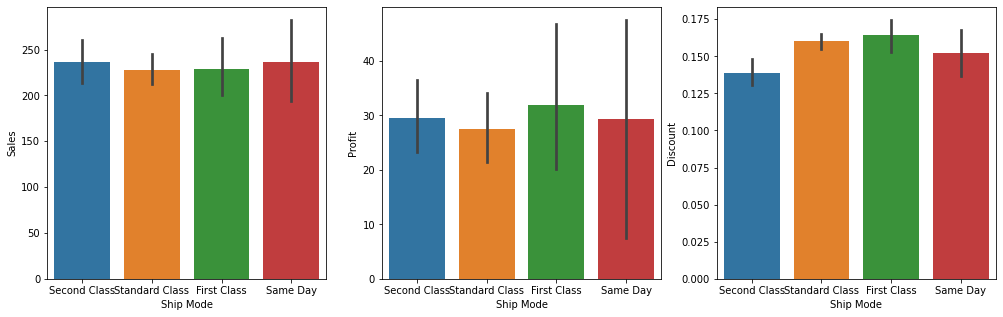

In [12]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Ship Mode', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Ship Mode', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Ship Mode', y='Discount', data = data,ax=ax[2])

* Most sales are in where shipping is carried on Same day.
* Due to high discounts in first class , it has Maximum profits.

### e) Based on Quantity -Sales & Profit & Discount


<AxesSubplot:xlabel='Quantity', ylabel='Discount'>

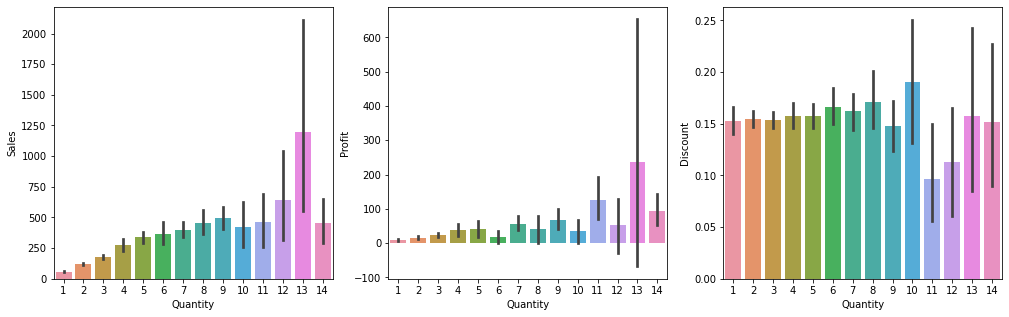

In [13]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Quantity', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Quantity', y='Profit', data = data,ax=ax[1])
sns.barplot(x='Quantity', y='Discount', data = data,ax=ax[2])

* 13 Number of Quantity is high for sales and Profit.
* But maximun discounts are given in #10



### f) Based on Discount -Sales & Profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

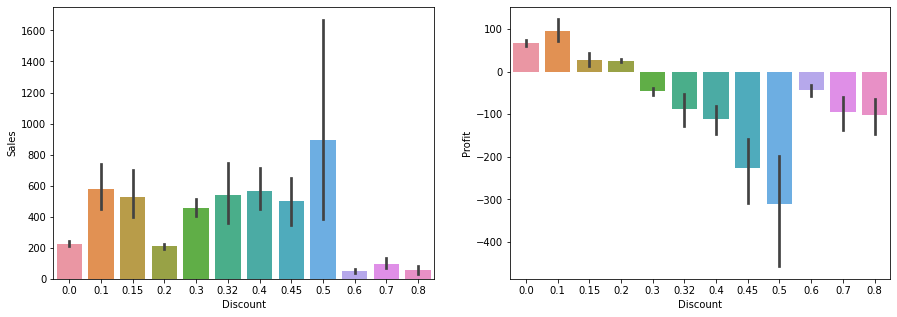

In [14]:
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.barplot(x='Discount', y='Sales', data = data,ax=ax[0])
sns.barplot(x='Discount', y='Profit', data = data)

As the Discount is increasing the profits are going into negative. But the same trend can be observed with sales after 60% dicount rates.At 50% discount the sales are maximum

## 2)Category Level Analysis

In [15]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

### a) Number of quantity in each Category

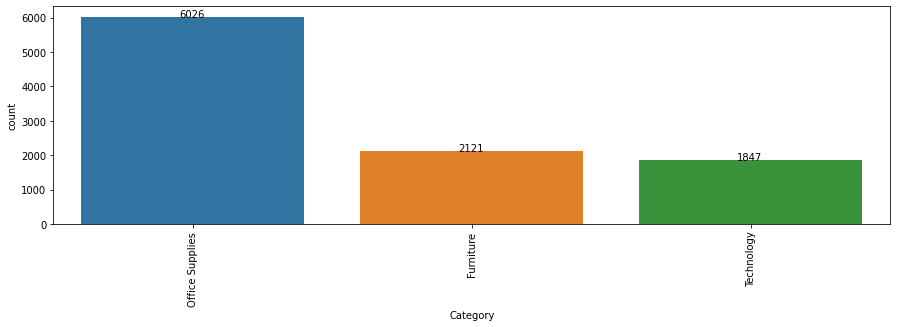

In [16]:
 
plt.figure(figsize=(15,4))
ax=sns.countplot("Category", data = data,order = data['Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.35, p.get_height()+1))
plt.show()

* The count of office supplies sold is highest when compared to remaining categories

### Number of Quantity in each Sub-Category

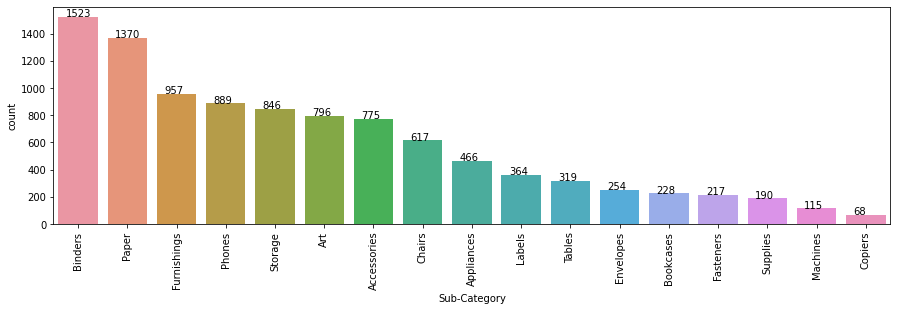

In [17]:
plt.figure(figsize=(15,4))
ax=sns.countplot("Sub-Category", data = data,order = data['Sub-Category'].value_counts().index)
plt.xticks(rotation=90)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.show()

* The sales of Binders and papers are highest compared to all other sub-categories

### Total Sub-Categories by Percentage

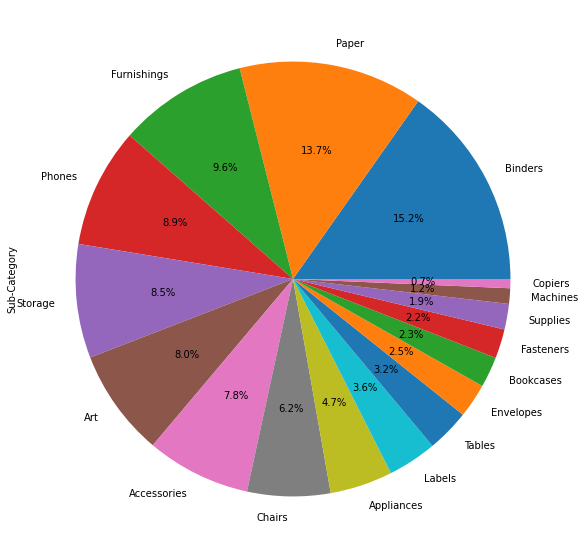

In [18]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

* The store has wide variety of Office Supplies especially in Binders and Paper department.

In [19]:
def autopct_format(values): 
    def my_format(pct): 
        plt.rcParams["figure.figsize"] = (13,5) 
        plt.rcParams['font.size'] = 12.0 
        plt.rcParams['font.weight'] = 6
        total = sum(values) 
        val = int(round(pct*total/100.0))
        return ' ${v:d}'.format(v=val)
    return my_format

### Category contributed most to the Sales

In [20]:
Top_category = data.groupby(["Category"]).sum().sort_values("Sales", ascending=False) 
Top_category = Top_category[["Sales"]]
total_revenue_category = '$' + str(int(Top_category["Sales"].sum()))
Top_category.reset_index(inplace=True)


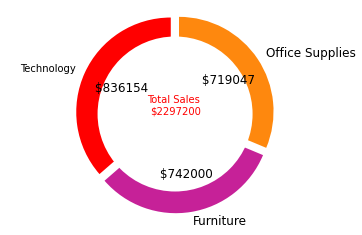

In [21]:
colors = ['red','#C62198','#FE880E']
explode = (0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_category['Sales'], colors = colors, labels=Top_category['Category'], autopct= autopct_format(Top_category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Sales \n'+str(total_revenue_category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()


* We can see that Category - Technology generated the highest revenue of about $836154.

* The Total Revenue generated by all the categories - $2297200!

### Sub-Category contributed most to the Sales

In [22]:
Top_Sub_Category= data.groupby(["Sub-Category"]).sum().sort_values("Sales", ascending=False) 
Top_Sub_Category= Top_Sub_Category[["Sales"]]
total_revenue_Sub_Category= '$' + str(int(Top_Sub_Category["Sales"].sum()))
Top_Sub_Category.reset_index(inplace=True)
Top_Sub_Category =Top_Sub_Category.head()

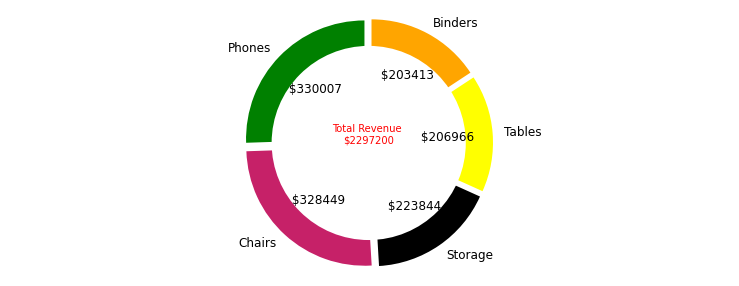

In [34]:
colors = ['green','#C62168','black','yellow','orange']
explode = (0.05,0.05,0.05,0.05,0.05)
fig1, ax1 = plt.subplots()
ax1.pie(Top_Sub_Category['Sales'], colors = colors, labels=Top_Sub_Category['Sub-Category'], autopct= autopct_format(Top_Sub_Category['Sales']), startangle=90,explode=explode)
centre_circle = plt.Circle((0,0),0.82,fc='white') 
fig = plt.gcf()
fig.gca().add_artist(centre_circle) 
ax1.axis('equal') 
label = ax1.annotate('Total Revenue \n'+str(total_revenue_Sub_Category),color = 'red', xy=(0, 0), fontsize=10, ha="center")
plt.show()


* We can see that Sub-Category - Phones(Technology) generated the highest revenue of about $330007

* The Total Revenue generated by all the categories - $2297200!

### f) Based on Category wise -Discount Vs Profit 

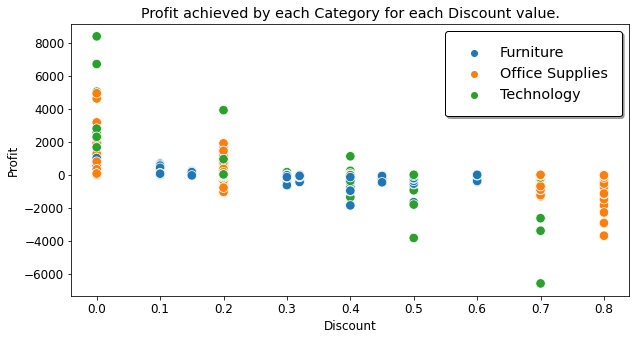

In [24]:
fig,ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x="Discount", y="Profit", data=data, hue="Category",ax=ax,s=90)
ax.legend(loc=1, fontsize='large',edgecolor='black', borderpad=1.0, shadow=True)
ax.set_title('Profit achieved by each Category for each Discount value.')
plt.show()

* The Office Supplies has maximum loss at 80%  and 0% discount. 
* Furniture and Technology had maximum loss at lower Discount rates

## 3) Geographic Level Analysis

### a) State wise Sales

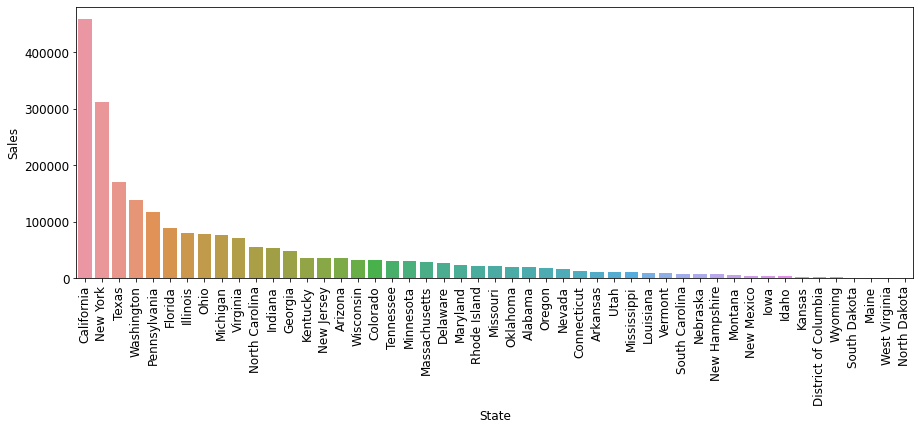

In [25]:
data_state= data.groupby(['State'])[['Sales']].sum().sort_values("Sales", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Sales', data = data_state)
plt.show()

* California and Newyork has highest sales followed by Texas
* Maine , West Virgina and North Dakota has lowest sales 

### b)State wise Profits

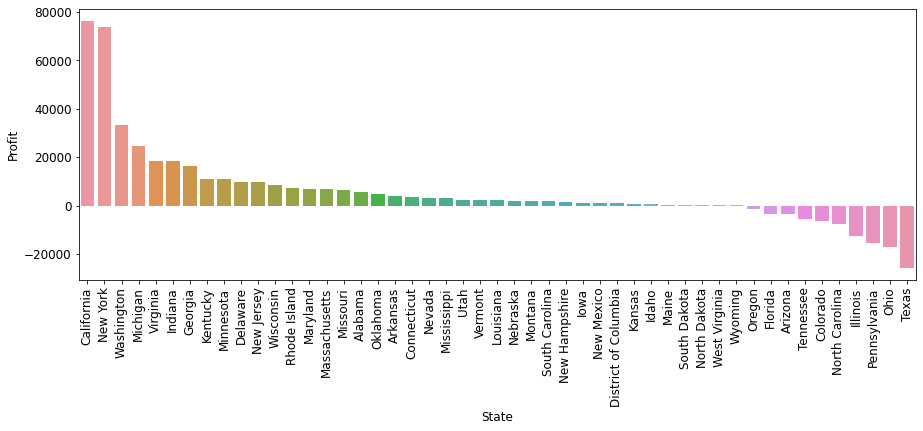

In [26]:
data_state= data.groupby(['State'])[['Profit']].sum().sort_values("Profit", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Profit', data = data_state)
plt.show()

* California has highest profits as well as sales followed by New York. 
* In some states the profits are in negative.

Lets have a look at those states ......

### States with Negative profits

In [27]:
state_low_Profit=data.loc[data.Profit < 0]
state_low_Profit=state_low_Profit.sort_values("Profit")


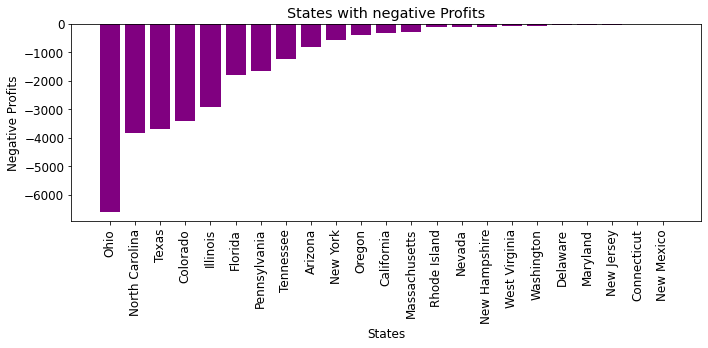

In [35]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(state_low_Profit['State'],state_low_Profit['Profit'],color='purple') 
ax.set_title(label="States with negative Profits")
ax.set_ylabel('Negative Profits')
ax.set_xlabel('States')
plt.xticks(rotation=90)
plt.tight_layout()


* Ohio has more than $6000 loss in profits .
* In total there are 23 states which are in losses.

### C)State wise Discount

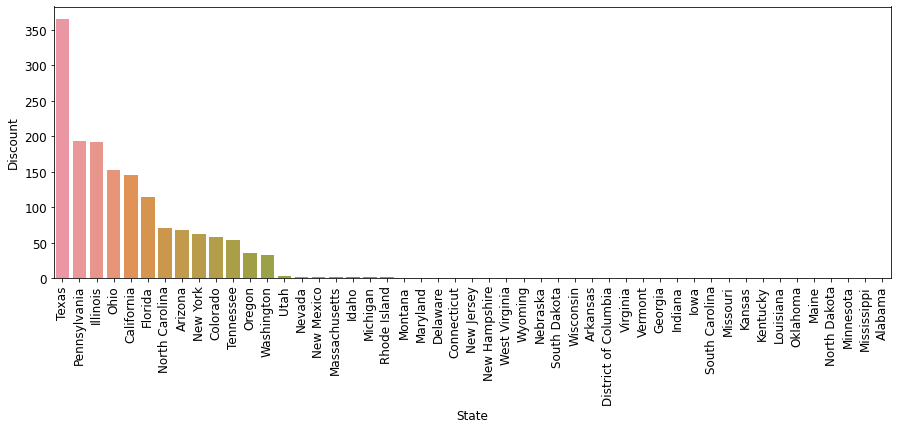

In [29]:
data_state= data.groupby(['State'])[['Discount']].sum().sort_values("Discount", ascending=False) 
data_state.reset_index(inplace=True)
plt.figure(figsize=(15,5))
plt.xticks(rotation=90),sns.barplot(x='State', y='Discount', data = data_state)
plt.show()

* Maximum discount is provided in Texas where profits are in negative. 
* Similar is happening with Ohio, illinous

### d) Analaysing States with Profit and Sales

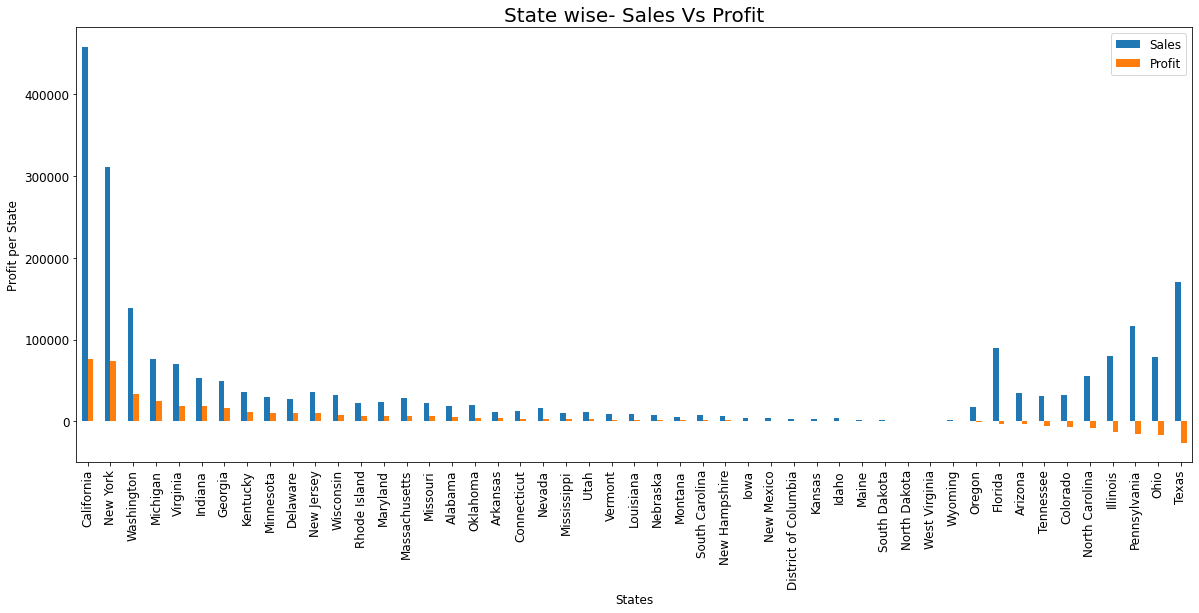

In [30]:
data_state= data.groupby(['State'])[['Sales', 'Profit']].sum()
data_state.sort_values("Profit", ascending=False).plot(kind = 'bar', figsize = (20,8))
plt.title('State wise- Sales Vs Profit', fontsize = 20)
plt.ylabel('Profit per State')
plt.xlabel('States')
plt.show()

The relation between sales and profits is not always linear. 
In some states , we can see the sales are in peak but the profits are not.

### e) Profit , Sales, Discount on GeoMap 

In [31]:
state = ['Alabama', 'Arizona' ,'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 
         'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
         'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana','Nebraska', 'Nevada', 'New Hampshire',
         'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
         'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
         'West Virginia', 'Wisconsin','Wyoming']
state_code = ['AL','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA','KS','KY','LA','ME','MD','MA',
              'MI','MN','MS','MO','MT','NE','NV','NH','NJ','NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN',
              'TX','UT','VT','VA','WA','WV','WI','WY']

In [32]:
state_df = pd.DataFrame(state, state_code) # Create a dataframe
state_df.reset_index(level=0, inplace=True)
state_df.columns = ['State Code','State']
sales = data.groupby(["State"]).sum().sort_values("Sales", ascending=False)
sales.reset_index(level=0, inplace=True)
sales= sales.sort_values('State', ascending=True)
sales.reset_index(inplace = True)
sales.drop('index',1,inplace = True)
sales.insert(1, 'State Code', state_df['State Code'])

Profit = data.groupby(["State"]).sum().sort_values("Profit", ascending=False)
Profit.reset_index(level=0, inplace=True)
Profit= Profit.sort_values('State', ascending=True)
Profit.reset_index(inplace = True)
Profit.drop('index',1,inplace = True)
Profit.insert(1, 'State Code', state_df['State Code'])

Discount = data.groupby(["State"]).sum().sort_values("Discount", ascending=False)
Discount.reset_index(level=0, inplace=True)
Discount= Discount.sort_values('State', ascending=True)
Discount.reset_index(inplace = True)
Discount.drop('index',1,inplace = True)
Discount.insert(1, 'State Code', state_df['State Code'])

In [ ]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, plot_mpl

sales['text'] = sales['State']
fig = go.Figure(data=go.Choropleth(locations=sales['State Code'], text=sales['text'],z = sales['Sales'].astype(float),
    locationmode = 'USA-states', colorscale = 'Reds',colorbar_title = "Sales"))

fig.update_layout(title_text = 'Sales in Different States',geo_scope='usa', )

fig.show();
Profit['text'] = Profit['State']
fig = go.Figure(data=go.Choropleth(locations=Profit['State Code'], text=Profit['text'],z = Profit['Profit'].astype(float),
    locationmode = 'USA-states', colorscale = 'emrld',colorbar_title = "Profits"))

fig.update_layout(title_text = 'Profits in Different States',geo_scope='usa', )

fig.show();

Discount['text'] = Discount['State']
fig = go.Figure(data=go.Choropleth(locations=Discount['State Code'], text=Discount['text'],z = Discount['Discount'].astype(float),
    locationmode = 'USA-states', colorscale = 'magenta',colorbar_title = "Discounts"))

fig.update_layout(title_text = 'Discounts in Different States',geo_scope='usa', )

fig.show();



In [ ]:
px.scatter(data_frame=data, x='State', y='Sales', size='Sales', color='Category')

We can observe that Florida has maximun sales in technology followed by Indiana in technology.

In [ ]:
px.scatter(data_frame=data, x='State', y='Sales', size='Sales', color='Segment')

We can observe that Florida has maximun sales in "Home Office" followed by Indiana in Corporate Segment.